In [1]:
import pytraj as pt
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib
from matplotlib import pyplot as plt
import gc
import mdtraj as md
import pandas as pd
import seaborn as sns

/cm/shared/apps/miniconda/lib/python2.7/site-packages/mdtraj/formats/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .dcd import DCDTrajectoryFile
/cm/shared/apps/miniconda/lib/python2.7/site-packages/mdtraj/formats/__init__.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .binpos import BINPOSTrajectoryFile
/cm/shared/apps/miniconda/lib/python2.7/site-packages/mdtraj/formats/__init__.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .xtc import XTCTrajectoryFile
/cm/shared/apps/miniconda/lib/python2.7/site-packages/mdtraj/formats/__init__.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .trr import TRRTrajectoryFile
/cm/shared/apps/miniconda/lib/python2.7/site-packages/mdtraj/formats/__init__.py:15: RuntimeWarning: numpy.dtype s

In [2]:
prob=np.loadtxt('probabilty_dipole_53windows.txt',delimiter=' ')
z_loc=np.loadtxt('window_z_location.txt',delimiter=' ')
hh=np.arange(0,190,10)
print hh

[  0  10  20 ... 160 170 180]


(18, 53)
[0.04242424 0.15878788 0.24363636 0.21636364 0.13272727 0.07575758
 0.04484848 0.02848485 0.01333333 0.00727273]
[-41. -39. -36. ...  58.  60.  62.]


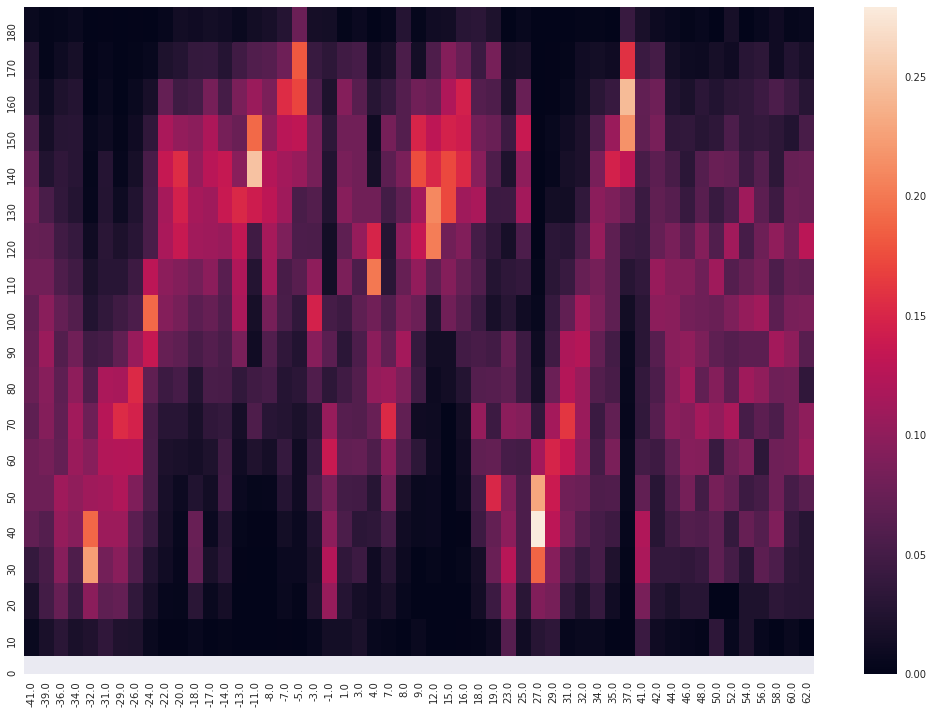

In [3]:
density=prob.reshape(53,18)
res=np.flip(density,axis=1)
density=res.T
yh=hh[::-1]

print np.shape(density)
print density[0:10,40]
print z_loc
hh=np.arange(0,190,10)
plt.rcParams['axes.facecolor']='white'
import matplotlib
matplotlib.rc('axes',edgecolor='k')
sns.set(rc={'figure.figsize':(17.7,12.27)})
sns.heatmap(density,xticklabels=z_loc,yticklabels=yh)

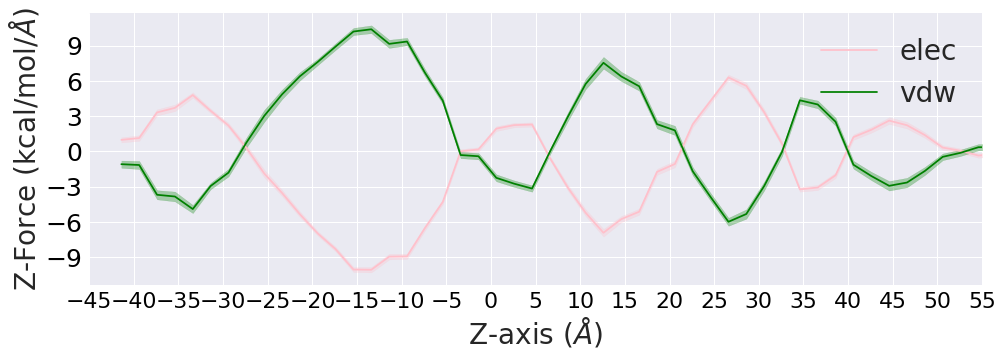

In [4]:
ele=pd.read_table('./force_ele.txt',header=None,delim_whitespace=True)
ele.columns=['z','fz','SE']

vdw=pd.read_table('./force_vdw.txt',header=None,delim_whitespace=True)
vdw.columns=['z','fz','SE']

#plt.rcParams['axes.facecolor']='white'
#matplotlib.rc('axes',edgecolor='k')
fig,ax1 = plt.subplots(figsize=(16,5))
ax1.grid()
ax1.legend(fontsize=22)
ax1.plot(ele['z'],ele['fz'],label='elec',color='pink')
ax1.fill_between(ele['z'],ele['fz']-ele['SE'],ele['fz']+ele['SE'],alpha=0.3,color='pink')
ax1.plot(ele['z'],vdw['fz'],label='vdw',color='green')
ax1.fill_between(ele['z'],vdw['fz']-vdw['SE'],vdw['fz']+vdw['SE'],alpha=0.3,color='green')
ax1.legend(fontsize=28)
ax1.set_xticks(np.arange(-41,72,10))
ax1.set_xlim(-45,55)
ax1.set_xlabel('Z-axis ($\AA$)',fontsize=28)
ax1.set_ylabel('Z-Force (kcal/mol/$\AA$)',fontsize=28)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x', labelsize=22)
ax1.tick_params(axis='y', labelsize=25)
ax1.set_xticks(np.arange(-45,60,5))
ax1.set_yticks(np.arange(-9,12,3))
ax1.grid()
